## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the both 
#data into a single dataset
# merge on mouse ID
comb_mousestudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

In [5]:
# Display the data table for preview
comb_mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice.
len(comb_mousestudy_df['Mouse ID'].unique())
#mice_no_study

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newmousedata = comb_mousestudy_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
newmousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
duplicate_id = comb_mousestudy_df[comb_mousestudy_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_id                                  

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
clean_mousedata =comb_mousestudy_df.loc[comb_mousestudy_df['Mouse ID']!='g989']
clean_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
len(clean_mousedata['Mouse ID'].unique())


248

In [10]:
# Checking the number of mice in the clean DataFrame.
newmousedata["Mouse ID"].count()

1888

In [11]:
# print(newmousedata['Tumor Volume (mm3)'].mean())
# print(newmousedata['Tumor Volume (mm3)'].median())
# print(newmousedata['Tumor Volume (mm3)'].var())   
# print(newmousedata['Tumor Volume (mm3)'].std())
# print(newmousedata['Tumor Volume (mm3)'].sem())

50.449276454131365
48.951421075
79.29127745388136
8.904564978362579
0.2049329125626731


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen Drug Regim

In [59]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#mean, median, variance, standard deviation and SEM.
# Assemble the resulting series into a single summary dataframe.
# Groupby on drug regimen and get aggregates
newmousedata_drugs = clean_mousedata.groupby(['Drug Regimen'])
newmousedata_drugs.agg(['mean','median','var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
### sch_overall_math = passing_math.groupby(["school_name"]).count()["student_name"]
### sch_overall_math

In [15]:
### newschool_metrics_m.columns = ["school_name", "reading_score", "math_score","size","budget", "Student Budget", "% Overall Passing", "% Passing Math"]
### newschool_metrics_m

In [16]:
### create table that highlights the top 5 performing schools based on Overall Passing Rate
### Sort with newschool_metrics_all

### top_performing_df = newschool_metrics_summary.sort_values(by=['% Overall Passing'], ascending=False).head(5)
### top_performing_df

In [17]:
### Dataframe of all reading scores by grade

### combine_all_scores_df3 =pd.concat([combine_scores_df, combine_scores_df2], axis=1)
#3# combine_all_scores_df3

In [18]:
### create table that breaks down school performance based on average spending per student
### pick "newschool_metrics_summary" and drop irrelvant columns
### school_metrics.drop(columns=['0_x','0_y',0], inplace=True)

### school_spending_score = newschool_metrics_summary.drop(columns=['school_name', 'Total Students', 'Total School Budget'], inplace=True)

## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

newmousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# filter the dataframe down to relevant columns for the chart: Drug Regimen & Timepoint
newmousedata_meas = newmousedata[['Drug Regimen', 'Timepoint']]
newmousedata_meas 
# set the index to be Drug Regimen so they will be used as labels
#newmousedata_meas = newmousedata_meas.set_index('Drug Regimen')


,Drug Regimen,Timepoint
0,Ramicane,0
1,Ramicane,5
2,Ramicane,10
3,Ramicane,15
4,Ramicane,20
...,...,...
1888,Naftisol,25
1889,Naftisol,30
1890,Naftisol,35
1891,Naftisol,40


In [60]:
newmousedata_meas = clean_mousedata['Drug Regimen'].value_counts()
newmousedata_meas

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Total Number of Measurements')

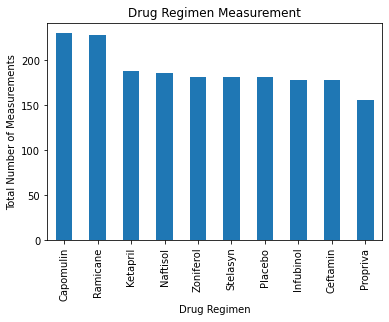

In [22]:
#use pandas DataFrame to plot bar chart
newmousedata_meas.plot(kind="bar", ) 
plt.title ("Drug Regimen Measurement")
plt.xlabel("Drug Regimen") 
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")

In [23]:
#convert data and make x axis to numby
newmousedata_idx =newmousedata_meas.index.to_numpy()

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

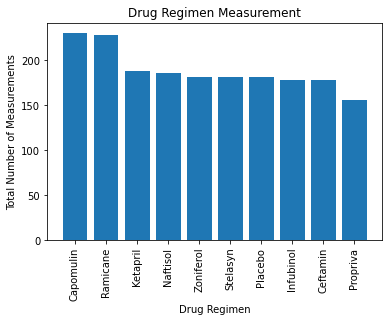

In [24]:
# use Matplotlib pyplot to generate a bar plot showing the total number of measurements taken on each drug regimen.
# set x axis and tick locations
plt.bar(newmousedata_idx, newmousedata_meas.values)
plt.title ("Drug Regimen Measurement")
plt.xlabel("Drug Regimen") 
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")
plt.bar

In [25]:
# plt.title ("Drug Regimen Measurement")
# plt.tight_layout() 
# plt.xlabel("Drug Regimen") 
# plt.ylabel("Total Number of Measurements")
# plt.show()

In [26]:





#.plot(kind="bar")

# x= np.arange(170, 240, 10)

##plt.subplot(131)
##plt.bar(names, values)
##plt.subplot(132)
##plt.scatter(names, values)
##plt.subplot(133)
##plt.plot(names, values)
##plt.suptitle('Categorical Plotting')
## plt.show()

In [27]:
# Generate a pie plot showing the distribution of female versus male
#newmousedata_idx
#newmousedata_meas.values


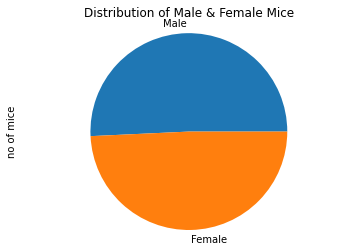

In [28]:
# Generate a pie plot showing the distribution of female versus male using pandas
newmousedata_pie_pd= newmousedata['Sex'].value_counts()
newmousedata_pie_pd =newmousedata_pie_pd.plot(kind="pie", )
newmousedata_pie_pd.set_ylabel("no of mice")
plt.title ("Distribution of Male & Female Mice")
plt.axis("equal")
plt.show()

In [29]:
newmousedata_pie_py= newmousedata['Sex'].value_counts()


Text(0.5, 1.0, 'Distribution of Male & Female Mice')

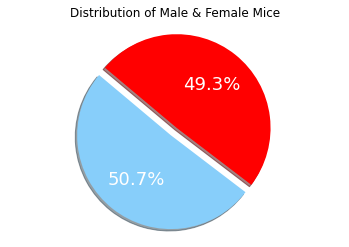

In [30]:
#create the piechart based upon the values below
# Automatically find the percentage of each part of the pie chart
Mice = ["Male", "Female"]
Number = [958, 930]
colors = ["lightskyblue", "red"]
# separate the male section in the pie chart
explode = (0.1, 0)
plt.pie(Number, explode=explode, labels=Mice, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, textprops={"color":"w", "size":18})
plt.axis("equal")
plt.title ("Distribution of Male & Female Mice")

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# filter the dataframe down to relevant columns for the chart: Drug Regimen & Timepoint
newmousedata_tvol = newmousedata[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]
newmousedata_tvol

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,k403,Ramicane,45.000000,0
1,k403,Ramicane,38.825898,5
2,k403,Ramicane,35.014271,10
3,k403,Ramicane,34.223992,15
4,k403,Ramicane,32.997729,20
...,...,...,...,...
1888,z969,Naftisol,63.145652,25
1889,z969,Naftisol,65.841013,30
1890,z969,Naftisol,69.176246,35
1891,z969,Naftisol,70.314904,40


In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_tr= newmousedata_tvol.groupby("Mouse ID")["Timepoint"].max() 
greatest_tr=greatest_tr.reset_index()
greatest_tr

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedtr_data =greatest_tr.merge(newmousedata_tvol, on=["Mouse ID", "Timepoint"], how = "left")
mergedtr_data

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
244,z435,10,Propriva,48.710661
245,z578,45,Ramicane,30.638696
246,z581,45,Infubinol,62.754451
247,z795,45,Naftisol,65.741070


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

In [35]:
#create a series that looks for each of the four drug regimen and the tumor impact
mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Capomulin", 'Tumor Volume (mm3)']
mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Ramicane", 'Tumor Volume (mm3)']
mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Infubinol", 'Tumor Volume (mm3)']
mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Ceftamin", 'Tumor Volume (mm3)']
mergedtr_data

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
244,z435,10,Propriva,48.710661
245,z578,45,Ramicane,30.638696
246,z581,45,Infubinol,62.754451
247,z795,45,Naftisol,65.741070


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


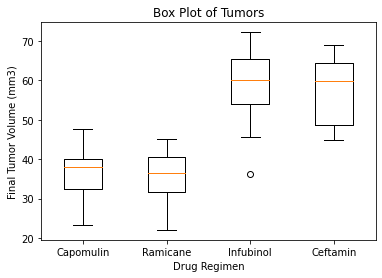

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mergedtr_data.loc[mergedtr_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
 
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest   
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Tumors')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list,labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Determne time point for mice treated with Capomulin
#Capomulin_tpt= mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Capomulin"]
#Capomulin_tpt= mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Capomulin", 'Timepoint']
Capomulin_tpt= newmousedata.loc[newmousedata["Drug Regimen"] == "Capomulin"]
Capomulin_tpt


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#newmousedata = comb_mousestudy_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
#newmousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
datamouse = Capomulin_tpt.loc[Capomulin_tpt['Mouse ID']== 'j119']
datamouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1
333,j119,Capomulin,Female,7,23,25,42.417166,1
334,j119,Capomulin,Female,7,23,30,43.013681,1
335,j119,Capomulin,Female,7,23,35,43.765705,1
336,j119,Capomulin,Female,7,23,40,44.585090,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


In [39]:
#Determne tumor volume for mice treated with Capomulin
Capomulin_tumor= mergedtr_data.loc[mergedtr_data["Drug Regimen"] == "Capomulin", 'Tumor Volume (mm3)']
Capomulin_tumor

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

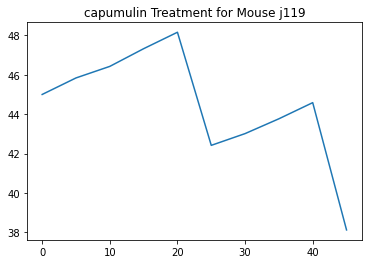

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#set x_axis as timepoints
x_axis = datamouse['Timepoint']
y = datamouse['Tumor Volume (mm3)']

plt.plot(x_axis, y)
plt.title("capumulin Treatment for Mouse j119")
plt.show()


#y = Capomulin_tumor



In [63]:
# Adds a legend and sets its location to the lower right
#plt.legend(loc="lower right")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/lineConfig.png")
#plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [65]:
avg_tumorvol= Capomulin_tpt.groupby("Mouse ID").mean()['Tumor Volume (mm3)']
avg_tumorvol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [66]:
merged_capo= mouse_metadata.merge(avg_tumorvol, on="Mouse ID")
merged_capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
0,s185,Capomulin,Female,3,17,34.559143
1,x401,Capomulin,Female,16,15,36.182040
2,m601,Capomulin,Male,22,17,34.847470
3,f966,Capomulin,Male,16,17,36.505973
4,u364,Capomulin,Male,18,17,39.887495
5,y793,Capomulin,Male,17,17,38.506829
6,r554,Capomulin,Female,8,17,36.509212
7,m957,Capomulin,Female,3,19,39.049816
8,t565,Capomulin,Female,20,17,39.328725
9,i738,Capomulin,Female,23,20,39.141053


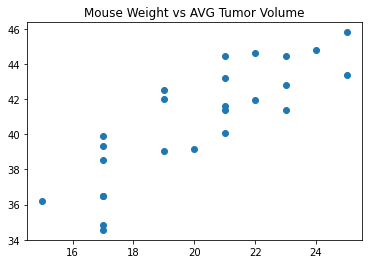

In [68]:
x_axis =merged_capo['Weight (g)']
y = merged_capo['Tumor Volume (mm3)']

plt.scatter(x_axis, y)
plt.title("Mouse Weight vs AVG Tumor Volume")
plt.xlabel
plt.ylabel("")
plt.show()


## Correlation and Regression

correlation is 0.841936342469472
rsquare is 0.7088568047708721


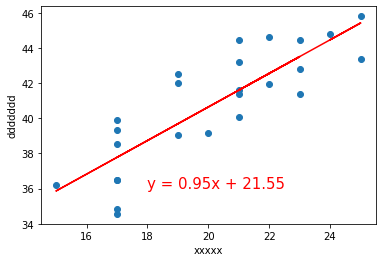

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot

x_values = merged_capo['Weight (g)']
y_values = merged_capo['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'correlation is {rvalue}')
print(f'rsquare is {rvalue**2}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('xxxxx')
plt.ylabel('ddddddd')
plt.show()